In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 5

In [3]:
# sigmoid activation function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# derivative of sigmoid activation function
def dsigmoid(input):
    return input * (1 - input)

# relu activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu activation function
def drelu(x):
    return np.where(x > 0, 1, 0)

In [4]:
# exclusive or function (true when number of true outputs is odd)
inputs = np.array([
    [0, 1], 
    [1, 0], 
    [0, 0], 
    [1, 1]
])
target_output = np.array([
    [1], 
    [1], 
    [0], 
    [0]
])

In [5]:
np.random.seed(1)
# initialize weights
weights_1 = 2 * np.random.randn(2,2) - 1
weights_2 = 2 * np.random.randn(2,2) - 1
#weights_1 = np.random.randn(2,2)*np.sqrt(2/4)
#weights_2 = np.random.randn(2,1)*np.sqrt(2/3)

# initialize bias
hidden_1_bias = 1
output_bias = 1

In [6]:
#takes in the inputs and adjusts the weights accordingly
def train(batch):
    global weights_2
    global weights_1
    global hidden_1_bias
    global output_bias

    ## feedforward
    layer_1_output = sigmoid(np.add(np.dot(batch, weights_1), hidden_1_bias))
    output = sigmoid(np.add(np.dot(layer_1_output, weights_2), output_bias))

    ## backprop
    
    # output layer
    output_error = np.subtract(target_output, output)
    output_gradient = output_error * dsigmoid(output) 
    output_delta = np.dot(layer_1_output.T, output_gradient) 

    # hidden layer 1
    layer_1_error = np.dot(output_gradient, weights_2.T)
    layer_1_gradient = layer_1_error * dsigmoid(layer_1_output) 
    layer_1_delta = np.dot(batch.T, layer_1_gradient)

    # update bias
    output_bias += np.average(output_gradient) * learning_rate
    hidden_1_bias += np.average(layer_1_gradient)* learning_rate
    
    # update weights
    weights_2 += output_delta * learning_rate
    weights_1 += layer_1_delta * learning_rate

    return output_error, output

In [7]:
error_list = []
index = []
for i in range(8001):
    nn_error, nn_output = train(inputs)
    mse = np.average(nn_error * nn_error)
    error_list.append(mse)
    index.append(i)
    if (i % 4000) == 0:
        print(mse)
        print(nn_output)

[[0.80988282 0.32964985]
 [0.90631426 0.00691543]
 [0.96624632 0.00710229]
 [0.83086539 0.03455655]]
0.38821521181486046
[[0.80988282 0.32964985]
 [0.90631426 0.00691543]
 [0.96624632 0.00710229]
 [0.83086539 0.03455655]]
[[0.77660374 0.55275328]
 [0.85082351 0.0099427 ]
 [0.94681738 0.01129834]
 [0.76470602 0.13391384]]
[[0.76057113 0.59204581]
 [0.78213635 0.01077564]
 [0.92031073 0.01322992]
 [0.72035734 0.17882734]]
[[0.74443688 0.59198977]
 [0.70018331 0.01042194]
 [0.88241056 0.01400305]
 [0.67050893 0.14777026]]
[[0.72919987 0.59038687]
 [0.60600806 0.01010672]
 [0.8273455  0.01482966]
 [0.60982112 0.11708834]]
[[0.7161438  0.58929664]
 [0.51320049 0.0098825 ]
 [0.75448121 0.01574752]
 [0.54265456 0.0912306 ]]
[[0.70697085 0.59153729]
 [0.4338758  0.00982926]
 [0.67059637 0.01681282]
 [0.47903683 0.07357635]]
[[0.70363152 0.59957605]
 [0.3761908  0.0100511 ]
 [0.59174067 0.01813472]
 [0.43122496 0.06408599]]
[[0.70646197 0.61311134]
 [0.34138606 0.01062878]
 [0.53217225 0.019820

 [0.50105451 0.50105362]]
[[0.95180625 0.9518065 ]
 [0.49935338 0.49935258]
 [0.0266823  0.02669218]
 [0.50105112 0.50105024]]
[[0.95188926 0.95188952]
 [0.4993556  0.4993548 ]
 [0.02663226 0.02664208]
 [0.50104775 0.50104688]]
[[0.95197188 0.95197213]
 [0.4993578  0.49935701]
 [0.02658247 0.02659223]
 [0.5010444  0.50104354]]
[[0.95205409 0.95205434]
 [0.49935999 0.49935921]
 [0.02653295 0.02654265]
 [0.50104107 0.50104022]]
[[0.9521359  0.95213615]
 [0.49936217 0.49936139]
 [0.02648368 0.02649332]
 [0.50103777 0.50103692]]
[[0.95221732 0.95221756]
 [0.49936432 0.49936355]
 [0.02643466 0.02644425]
 [0.50103448 0.50103364]]
[[0.95229834 0.95229858]
 [0.49936647 0.4993657 ]
 [0.0263859  0.02639543]
 [0.50103121 0.50103038]]
[[0.95237898 0.95237922]
 [0.4993686  0.49936783]
 [0.02633739 0.02634686]
 [0.50102797 0.50102714]]
[[0.95245922 0.95245946]
 [0.49937071 0.49936995]
 [0.02628912 0.02629853]
 [0.50102474 0.50102391]]
[[0.95253909 0.95253933]
 [0.49937281 0.49937206]
 [0.0262411  0.

 [0.5005729  0.5005727 ]]
[[0.96506682 0.96506689]
 [0.49965506 0.49965487]
 [0.01887866 0.01888188]
 [0.50057186 0.50057166]]
[[0.96509991 0.96509998]
 [0.49965569 0.4996555 ]
 [0.01885963 0.01886285]
 [0.50057082 0.50057062]]
[[0.9651329  0.96513297]
 [0.49965632 0.49965613]
 [0.01884066 0.01884387]
 [0.50056979 0.50056959]]
[[0.9651658  0.96516587]
 [0.49965694 0.49965676]
 [0.01882175 0.01882494]
 [0.50056876 0.50056856]]
[[0.96519862 0.96519869]
 [0.49965756 0.49965738]
 [0.01880289 0.01880607]
 [0.50056773 0.50056753]]
[[0.96523134 0.96523141]
 [0.49965818 0.499658  ]
 [0.01878408 0.01878725]
 [0.50056671 0.50056651]]
[[0.96526398 0.96526405]
 [0.4996588  0.49965862]
 [0.01876532 0.01876848]
 [0.50056569 0.50056549]]
[[0.96529653 0.9652966 ]
 [0.49965942 0.49965923]
 [0.01874662 0.01874977]
 [0.50056468 0.50056448]]
[[0.96532899 0.96532906]
 [0.49966003 0.49965985]
 [0.01872797 0.01873111]
 [0.50056367 0.50056347]]
[[0.96536136 0.96536143]
 [0.49966064 0.49966046]
 [0.01870937 0.

 [0.50036516 0.50036508]]
[[0.97233502 0.97233505]
 [0.49977942 0.49977935]
 [0.01474829 0.01474976]
 [0.50036472 0.50036465]]
[[0.97235189 0.97235192]
 [0.49977968 0.49977961]
 [0.01473882 0.01474028]
 [0.50036429 0.50036422]]
[[0.97236873 0.97236876]
 [0.49977993 0.49977987]
 [0.01472936 0.01473082]
 [0.50036386 0.50036379]]
[[0.97238554 0.97238557]
 [0.49978019 0.49978012]
 [0.01471992 0.01472138]
 [0.50036343 0.50036336]]
[[0.97240232 0.97240235]
 [0.49978045 0.49978038]
 [0.0147105  0.01471195]
 [0.50036301 0.50036293]]
[[0.97241907 0.9724191 ]
 [0.4997807  0.49978063]
 [0.0147011  0.01470254]
 [0.50036258 0.50036251]]
[[0.97243579 0.97243582]
 [0.49978095 0.49978089]
 [0.01469171 0.01469315]
 [0.50036215 0.50036208]]
[[0.97245248 0.97245251]
 [0.49978121 0.49978114]
 [0.01468234 0.01468378]
 [0.50036173 0.50036165]]
[[0.97246914 0.97246917]
 [0.49978146 0.49978139]
 [0.01467298 0.01467442]
 [0.5003613  0.50036123]]
[[0.97248578 0.9724858 ]
 [0.49978171 0.49978165]
 [0.01466364 0.

[[0.97566495 0.97566497]
 [0.49982735 0.49982731]
 [0.01288785 0.0128888 ]
 [0.50028425 0.50028421]]
[[0.97567657 0.97567659]
 [0.4998275  0.49982747]
 [0.01288139 0.01288234]
 [0.50028398 0.50028394]]
[[0.97568818 0.9756882 ]
 [0.49982766 0.49982762]
 [0.01287493 0.01287589]
 [0.50028372 0.50028368]]
[[0.97569978 0.9756998 ]
 [0.49982782 0.49982778]
 [0.01286849 0.01286944]
 [0.50028346 0.50028341]]
[[0.97571135 0.97571137]
 [0.49982798 0.49982794]
 [0.01286206 0.01286301]
 [0.50028319 0.50028315]]
[[0.97572292 0.97572293]
 [0.49982813 0.49982809]
 [0.01285563 0.01285658]
 [0.50028293 0.50028289]]
[[0.97573446 0.97573448]
 [0.49982829 0.49982825]
 [0.01284922 0.01285016]
 [0.50028267 0.50028263]]
[[0.97574599 0.97574601]
 [0.49982844 0.4998284 ]
 [0.01284281 0.01284376]
 [0.50028241 0.50028236]]
[[0.97575751 0.97575752]
 [0.4998286  0.49982856]
 [0.01283642 0.01283736]
 [0.50028214 0.5002821 ]]
[[0.975769   0.97576902]
 [0.49982875 0.49982872]
 [0.01283003 0.01283097]
 [0.50028188 0.5

[[0.97814002 0.97814003]
 [0.49985933 0.4998593 ]
 [0.01151775 0.01151842]
 [0.50023055 0.50023053]]
[[0.97814853 0.97814854]
 [0.49985943 0.49985941]
 [0.01151306 0.01151373]
 [0.50023038 0.50023035]]
[[0.97815703 0.97815704]
 [0.49985954 0.49985951]
 [0.01150837 0.01150904]
 [0.5002302  0.50023018]]
[[0.97816552 0.97816553]
 [0.49985964 0.49985962]
 [0.01150369 0.01150436]
 [0.50023003 0.50023   ]]
[[0.978174   0.97817401]
 [0.49985974 0.49985972]
 [0.01149902 0.01149968]
 [0.50022985 0.50022983]]
[[0.97818247 0.97818248]
 [0.49985985 0.49985982]
 [0.01149435 0.01149501]
 [0.50022968 0.50022965]]
[[0.97819093 0.97819094]
 [0.49985995 0.49985993]
 [0.01148969 0.01149035]
 [0.5002295  0.50022948]]
[[0.97819938 0.97819939]
 [0.49986006 0.49986003]
 [0.01148503 0.01148569]
 [0.50022933 0.5002293 ]]
[[0.97820782 0.97820783]
 [0.49986016 0.49986014]
 [0.01148037 0.01148104]
 [0.50022916 0.50022913]]
[[0.97821625 0.97821626]
 [0.49986026 0.49986024]
 [0.01147573 0.01147639]
 [0.50022898 0.5

[[0.98004613 0.98004614]
 [0.49988184 0.49988182]
 [0.01047004 0.01047054]
 [0.50019284 0.50019282]]
[[0.98005265 0.98005266]
 [0.49988191 0.49988189]
 [0.01046647 0.01046696]
 [0.50019272 0.5001927 ]]
[[0.98005916 0.98005917]
 [0.49988198 0.49988197]
 [0.0104629  0.01046339]
 [0.50019259 0.50019257]]
[[0.98006567 0.98006568]
 [0.49988206 0.49988204]
 [0.01045933 0.01045983]
 [0.50019247 0.50019245]]
[[0.98007217 0.98007218]
 [0.49988213 0.49988211]
 [0.01045577 0.01045626]
 [0.50019235 0.50019233]]
[[0.98007867 0.98007868]
 [0.4998822  0.49988219]
 [0.01045221 0.0104527 ]
 [0.50019222 0.50019221]]
[[0.98008516 0.98008517]
 [0.49988228 0.49988226]
 [0.01044866 0.01044915]
 [0.5001921  0.50019208]]
[[0.98009164 0.98009165]
 [0.49988235 0.49988233]
 [0.0104451  0.0104456 ]
 [0.50019198 0.50019196]]
[[0.98009812 0.98009813]
 [0.49988242 0.49988241]
 [0.01044156 0.01044205]
 [0.50019186 0.50019184]]
[[0.98010459 0.9801046 ]
 [0.4998825  0.49988248]
 [0.01043801 0.0104385 ]
 [0.50019173 0.5

[[0.98165464 0.98165464]
 [0.49989939 0.49989937]
 [0.009591   0.00959138]
 [0.50016352 0.50016351]]
[[0.98165974 0.98165974]
 [0.49989944 0.49989943]
 [0.00958822 0.0095886 ]
 [0.50016343 0.50016342]]
[[0.98166483 0.98166484]
 [0.49989949 0.49989948]
 [0.00958545 0.00958582]
 [0.50016334 0.50016333]]
[[0.98166993 0.98166993]
 [0.49989955 0.49989953]
 [0.00958267 0.00958305]
 [0.50016325 0.50016324]]
[[0.98167501 0.98167502]
 [0.4998996  0.49989959]
 [0.0095799  0.00958027]
 [0.50016316 0.50016315]]
[[0.9816801  0.98168011]
 [0.49989965 0.49989964]
 [0.00957713 0.0095775 ]
 [0.50016307 0.50016306]]
[[0.98168518 0.98168519]
 [0.49989971 0.49989969]
 [0.00957436 0.00957473]
 [0.50016298 0.50016297]]
[[0.98169025 0.98169026]
 [0.49989976 0.49989975]
 [0.00957159 0.00957197]
 [0.50016289 0.50016288]]
[[0.98169533 0.98169533]
 [0.49989981 0.4998998 ]
 [0.00956883 0.0095692 ]
 [0.50016281 0.50016279]]
[[0.98170039 0.9817004 ]
 [0.49989987 0.49989985]
 [0.00956607 0.00956644]
 [0.50016272 0.5

 [0.50014488 0.50014487]]
[[0.9827543  0.9827543 ]
 [0.49991062 0.49991061]
 [0.00899277 0.00899308]
 [0.50014481 0.5001448 ]]
[[0.98275856 0.98275856]
 [0.49991066 0.49991065]
 [0.00899046 0.00899077]
 [0.50014474 0.50014473]]
[[0.98276281 0.98276281]
 [0.4999107  0.49991069]
 [0.00898815 0.00898846]
 [0.50014467 0.50014466]]
[[0.98276706 0.98276707]
 [0.49991074 0.49991074]
 [0.00898584 0.00898615]
 [0.5001446  0.50014459]]
[[0.98277131 0.98277131]
 [0.49991079 0.49991078]
 [0.00898354 0.00898384]
 [0.50014453 0.50014452]]
[[0.98277555 0.98277556]
 [0.49991083 0.49991082]
 [0.00898123 0.00898154]
 [0.50014446 0.50014445]]
[[0.98277979 0.9827798 ]
 [0.49991087 0.49991086]
 [0.00897893 0.00897923]
 [0.50014439 0.50014438]]
[[0.98278403 0.98278404]
 [0.49991091 0.4999109 ]
 [0.00897663 0.00897693]
 [0.50014432 0.50014431]]
[[0.98278827 0.98278827]
 [0.49991095 0.49991095]
 [0.00897433 0.00897463]
 [0.50014425 0.50014424]]
[[0.9827925  0.98279251]
 [0.499911   0.49991099]
 [0.00897203 0.

 [0.50012646 0.50012645]]
[[0.98390451 0.98390452]
 [0.49992169 0.49992169]
 [0.00836945 0.00836969]
 [0.50012641 0.5001264 ]]
[[0.98390799 0.98390799]
 [0.49992173 0.49992172]
 [0.00836757 0.00836781]
 [0.50012635 0.50012635]]
[[0.98391147 0.98391147]
 [0.49992176 0.49992175]
 [0.00836569 0.00836593]
 [0.5001263  0.50012629]]
[[0.98391494 0.98391494]
 [0.49992179 0.49992179]
 [0.00836381 0.00836406]
 [0.50012625 0.50012624]]
[[0.98391841 0.98391841]
 [0.49992182 0.49992182]
 [0.00836193 0.00836218]
 [0.50012619 0.50012618]]
[[0.98392188 0.98392188]
 [0.49992186 0.49992185]
 [0.00836006 0.0083603 ]
 [0.50012614 0.50012613]]
[[0.98392535 0.98392535]
 [0.49992189 0.49992188]
 [0.00835818 0.00835843]
 [0.50012608 0.50012608]]
[[0.98392881 0.98392881]
 [0.49992192 0.49992191]
 [0.00835631 0.00835655]
 [0.50012603 0.50012602]]
[[0.98393227 0.98393228]
 [0.49992195 0.49992195]
 [0.00835444 0.00835468]
 [0.50012598 0.50012597]]
[[0.98393573 0.98393574]
 [0.49992199 0.49992198]
 [0.00835257 0.

 [0.50011543 0.50011542]]
[[0.98463245 0.98463246]
 [0.49992835 0.49992834]
 [0.00797626 0.00797647]
 [0.50011538 0.50011538]]
[[0.98463549 0.98463549]
 [0.49992838 0.49992837]
 [0.00797462 0.00797483]
 [0.50011534 0.50011533]]
[[0.98463853 0.98463853]
 [0.4999284  0.4999284 ]
 [0.00797299 0.0079732 ]
 [0.50011529 0.50011529]]
[[0.98464156 0.98464156]
 [0.49992843 0.49992842]
 [0.00797135 0.00797156]
 [0.50011525 0.50011524]]
[[0.98464459 0.98464459]
 [0.49992846 0.49992845]
 [0.00796971 0.00796993]
 [0.50011521 0.5001152 ]]
[[0.98464762 0.98464762]
 [0.49992848 0.49992848]
 [0.00796808 0.00796829]
 [0.50011516 0.50011515]]
[[0.98465065 0.98465065]
 [0.49992851 0.49992851]
 [0.00796645 0.00796666]
 [0.50011512 0.50011511]]
[[0.98465367 0.98465368]
 [0.49992854 0.49992853]
 [0.00796481 0.00796503]
 [0.50011507 0.50011507]]
[[0.9846567  0.9846567 ]
 [0.49992857 0.49992856]
 [0.00796318 0.00796339]
 [0.50011503 0.50011502]]
[[0.98465972 0.98465972]
 [0.49992859 0.49992859]
 [0.00796155 0.

[[0.98537243 0.98537243]
 [0.49993483 0.49993482]
 [0.00757762 0.0075778 ]
 [0.50010468 0.50010467]]
[[0.98537506 0.98537506]
 [0.49993485 0.49993485]
 [0.00757621 0.00757639]
 [0.50010464 0.50010464]]
[[0.98537768 0.98537769]
 [0.49993487 0.49993487]
 [0.0075748  0.00757498]
 [0.50010461 0.5001046 ]]
[[0.98538031 0.98538031]
 [0.4999349  0.49993489]
 [0.00757338 0.00757356]
 [0.50010457 0.50010456]]
[[0.98538293 0.98538293]
 [0.49993492 0.49993491]
 [0.00757197 0.00757215]
 [0.50010453 0.50010453]]
[[0.98538555 0.98538555]
 [0.49993494 0.49993494]
 [0.00757056 0.00757074]
 [0.50010449 0.50010449]]
[[0.98538817 0.98538817]
 [0.49993496 0.49993496]
 [0.00756915 0.00756933]
 [0.50010446 0.50010445]]
[[0.98539079 0.98539079]
 [0.49993498 0.49993498]
 [0.00756774 0.00756792]
 [0.50010442 0.50010442]]
[[0.98539341 0.98539341]
 [0.49993501 0.499935  ]
 [0.00756634 0.00756652]
 [0.50010438 0.50010438]]
[[0.98539602 0.98539603]
 [0.49993503 0.49993503]
 [0.00756493 0.00756511]
 [0.50010435 0.5

[[0.98595879 0.98595879]
 [0.49993976 0.49993975]
 [0.0072625  0.00726266]
 [0.50009656 0.50009655]]
[[0.98596112 0.98596112]
 [0.49993978 0.49993977]
 [0.00726125 0.00726141]
 [0.50009652 0.50009652]]
[[0.98596345 0.98596345]
 [0.49993979 0.49993979]
 [0.00726    0.00726016]
 [0.50009649 0.50009649]]
[[0.98596578 0.98596578]
 [0.49993981 0.49993981]
 [0.00725875 0.00725891]
 [0.50009646 0.50009646]]
[[0.9859681  0.98596811]
 [0.49993983 0.49993983]
 [0.0072575  0.00725766]
 [0.50009643 0.50009642]]
[[0.98597043 0.98597043]
 [0.49993985 0.49993985]
 [0.00725625 0.00725641]
 [0.5000964  0.50009639]]
[[0.98597275 0.98597276]
 [0.49993987 0.49993987]
 [0.00725501 0.00725516]
 [0.50009637 0.50009636]]
[[0.98597508 0.98597508]
 [0.49993989 0.49993989]
 [0.00725376 0.00725392]
 [0.50009633 0.50009633]]
[[0.9859774  0.9859774 ]
 [0.49993991 0.49993991]
 [0.00725251 0.00725267]
 [0.5000963  0.5000963 ]]
[[0.98597972 0.98597972]
 [0.49993993 0.49993992]
 [0.00725127 0.00725142]
 [0.50009627 0.5

 [0.50008717 0.50008717]]
[[0.98666896 0.98666896]
 [0.49994548 0.49994548]
 [0.00688177 0.0068819 ]
 [0.50008714 0.50008714]]
[[0.98667096 0.98667096]
 [0.4999455  0.49994549]
 [0.0068807  0.00688083]
 [0.50008712 0.50008711]]
[[0.98667295 0.98667296]
 [0.49994551 0.49994551]
 [0.00687963 0.00687976]
 [0.50008709 0.50008709]]
[[0.98667495 0.98667496]
 [0.49994553 0.49994552]
 [0.00687856 0.00687869]
 [0.50008706 0.50008706]]
[[0.98667695 0.98667695]
 [0.49994554 0.49994554]
 [0.00687749 0.00687762]
 [0.50008704 0.50008704]]
[[0.98667895 0.98667895]
 [0.49994556 0.49994556]
 [0.00687642 0.00687655]
 [0.50008701 0.50008701]]
[[0.98668094 0.98668095]
 [0.49994557 0.49994557]
 [0.00687535 0.00687548]
 [0.50008699 0.50008698]]
[[0.98668294 0.98668294]
 [0.49994559 0.49994559]
 [0.00687428 0.00687442]
 [0.50008696 0.50008696]]
[[0.98668493 0.98668493]
 [0.49994561 0.4999456 ]
 [0.00687322 0.00687335]
 [0.50008694 0.50008693]]
[[0.98668693 0.98668693]
 [0.49994562 0.49994562]
 [0.00687215 0.

[[0.98726724 0.98726724]
 [0.49995009 0.49995009]
 [0.00656182 0.00656193]
 [0.50007958 0.50007957]]
[[0.98726898 0.98726899]
 [0.49995011 0.4999501 ]
 [0.00656088 0.006561  ]
 [0.50007956 0.50007955]]
[[0.98727073 0.98727073]
 [0.49995012 0.49995012]
 [0.00655995 0.00656007]
 [0.50007953 0.50007953]]
[[0.98727248 0.98727248]
 [0.49995013 0.49995013]
 [0.00655902 0.00655913]
 [0.50007951 0.50007951]]
[[0.98727422 0.98727422]
 [0.49995015 0.49995014]
 [0.00655809 0.0065582 ]
 [0.50007949 0.50007949]]
[[0.98727597 0.98727597]
 [0.49995016 0.49995016]
 [0.00655715 0.00655727]
 [0.50007947 0.50007947]]
[[0.98727771 0.98727771]
 [0.49995017 0.49995017]
 [0.00655622 0.00655634]
 [0.50007945 0.50007944]]
[[0.98727946 0.98727946]
 [0.49995019 0.49995018]
 [0.00655529 0.00655541]
 [0.50007943 0.50007942]]
[[0.9872812  0.9872812 ]
 [0.4999502  0.4999502 ]
 [0.00655436 0.00655448]
 [0.5000794  0.5000794 ]]
[[0.98728294 0.98728294]
 [0.49995021 0.49995021]
 [0.00655343 0.00655354]
 [0.50007938 0.5

 [0.5000733  0.5000733 ]]
[[0.98778667 0.98778667]
 [0.49995394 0.49995394]
 [0.00628464 0.00628474]
 [0.50007328 0.50007328]]
[[0.98778822 0.98778822]
 [0.49995395 0.49995395]
 [0.00628381 0.00628391]
 [0.50007326 0.50007326]]
[[0.98778977 0.98778977]
 [0.49995397 0.49995396]
 [0.00628299 0.00628309]
 [0.50007324 0.50007324]]
[[0.98779131 0.98779131]
 [0.49995398 0.49995397]
 [0.00628216 0.00628226]
 [0.50007322 0.50007322]]
[[0.98779285 0.98779286]
 [0.49995399 0.49995399]
 [0.00628134 0.00628144]
 [0.50007321 0.5000732 ]]
[[0.9877944  0.9877944 ]
 [0.499954   0.499954  ]
 [0.00628052 0.00628062]
 [0.50007319 0.50007319]]
[[0.98779594 0.98779594]
 [0.49995401 0.49995401]
 [0.0062797  0.0062798 ]
 [0.50007317 0.50007317]]
[[0.98779748 0.98779749]
 [0.49995402 0.49995402]
 [0.00627887 0.00627897]
 [0.50007315 0.50007315]]
[[0.98779903 0.98779903]
 [0.49995403 0.49995403]
 [0.00627805 0.00627815]
 [0.50007313 0.50007313]]
[[0.98780057 0.98780057]
 [0.49995404 0.49995404]
 [0.00627723 0.

[[0.98819411 0.98819411]
 [0.49995686 0.49995686]
 [0.00606762 0.00606771]
 [0.50006852 0.50006852]]
[[0.98819551 0.98819551]
 [0.49995687 0.49995687]
 [0.00606688 0.00606697]
 [0.5000685  0.5000685 ]]
[[0.98819691 0.98819691]
 [0.49995688 0.49995688]
 [0.00606613 0.00606622]
 [0.50006849 0.50006848]]
[[0.9881983  0.98819831]
 [0.49995689 0.49995689]
 [0.00606539 0.00606548]
 [0.50006847 0.50006847]]
[[0.9881997  0.9881997 ]
 [0.4999569  0.4999569 ]
 [0.00606464 0.00606473]
 [0.50006845 0.50006845]]
[[0.9882011  0.9882011 ]
 [0.49995691 0.49995691]
 [0.0060639  0.00606399]
 [0.50006844 0.50006844]]
[[0.9882025  0.9882025 ]
 [0.49995692 0.49995692]
 [0.00606316 0.00606325]
 [0.50006842 0.50006842]]
[[0.98820389 0.98820389]
 [0.49995693 0.49995693]
 [0.00606241 0.0060625 ]
 [0.5000684  0.5000684 ]]
[[0.98820529 0.98820529]
 [0.49995694 0.49995694]
 [0.00606167 0.00606176]
 [0.50006839 0.50006839]]
[[0.98820668 0.98820668]
 [0.49995695 0.49995695]
 [0.00606093 0.00606102]
 [0.50006837 0.5

KeyboardInterrupt: 

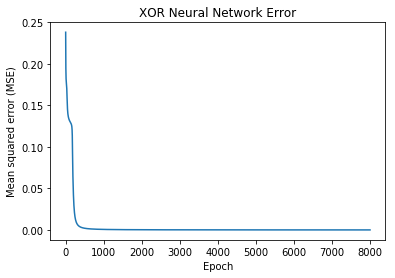

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (MSE)')
plt.title('XOR Neural Network Error')
plt.show()

In [9]:
error_list[2000] #0.00026032175346313156

0.00026032175346313156